# Usage for classification of a complete video

Loads a pre-trained model and creates predictions for coordinate data. These predictions are rendered as a text overlay on top of the original video.

In [24]:
import pandas as pd
import pickle

In [34]:
df = pd.read_hdf("merged_20210405.h5")
session_name = '233_monhab_gopro_cut_day1DLC_resnet50_goprovrJul24shuffle1_1030000.h5'
df = df[df['file_name'] == session_name]
clf = pickle.load(open("random_forest_merge.sav", 'rb'))

In [35]:
features = [('head', 'x'), ('head', 'y'), 
            ('tail', 'x'), ('tail', 'y'),  
            
            ('left_neck', 'x'), ('left_neck', 'y'), 
            ('right_neck', 'x'), ('right_neck', 'y'), 
            
            ('left_up_wing', 'x'), ('left_up_wing', 'y'),
            ('left_middle_wing', 'x'), ('left_middle_wing', 'y'),
            ('left_down_wing', 'x'), ('left_down_wing', 'y'),
            
            ('right_up_wing', 'x'), ('right_up_wing', 'y'),
            ('right_middle_wing', 'x'), ('right_middle_wing', 'y'),
            ('right_down_wing', 'x'), ('right_down_wing', 'y'),
]

#df = df[(df['behavior'] != "not_defined")]
df.loc[(df['behavior'] == "back_preening") | (df['behavior'] == "front_preening"), 'behavior'] = "preening"
df.loc[(df['behavior'] == "standing_shaking") | (df['behavior'] == "scratch_with_feet"), 'behavior'] = "standing"
df.loc[(df['behavior'] == "body_pump") | (df['behavior'] == "feather_clapping"), 'behavior'] = "fluffing"

x = df[features].values
y = df['behavior']

In [36]:
preds_proba = clf.predict_proba(x)
preds = clf.predict(x)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.4s finished


In [37]:
preds[0]

'eating'

In [38]:
preds_proba[0]

array([0.98, 0.  , 0.  , 0.  , 0.  , 0.02, 0.  ])

In [39]:
len(y)

71926

In [40]:
len(x)

71926

In [41]:
clf.classes_

array(['eating', 'fluffing', 'head_shake', 'preening', 'standing',
       'tail_shake', 'walking'], dtype=object)

In [42]:
import cv2
import numpy as np

np.set_printoptions(precision=2)

cap = cv2.VideoCapture('233_monhab_gopro_cut_day1.MP4')
framerate = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('single_frame_rf.mp4', fourcc, framerate, (1280,  960))
frame_number = 0
while True:
    ret, frame = cap.read()
    if ret:

        b = preds[frame_number]
        proba = preds_proba[frame_number]
        cv2.putText(frame, b, (70, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (130, 255, 130), 2, cv2.LINE_AA)
        cv2.putText(frame, y[frame_number], (400, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (130, 255, 255), 2, cv2.LINE_AA)
        cv2.putText(frame, np.array2string(proba), (70, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (130, 255, 130), 1, cv2.LINE_AA)
        
        
        for i, v in enumerate(preds_proba[frame_number]):
            label = clf.classes_[i]
            y_pos = 120 + 20 * i
            x_pos = 250
            
            cv2.putText(frame, label, (70, y_pos), cv2.FONT_HERSHEY_SIMPLEX, 1, (130, 255, 130), 1, cv2.LINE_AA)
            
            bar = (int(x_pos + 100 * preds_proba[frame_number][i]), y_pos)
            cv2.line(frame, (x_pos, y_pos), bar, (0,0,255), 10)
        
        out.write(frame)

        frame_number = frame_number + 1
#         if frame_number == 1200:
#             break
    else:
        break

cap.release()
out.release()

In [78]:
cap = cv2.VideoCapture('233_monhab_gopro_cut_day1.MP4')
_, frame = cap.read()

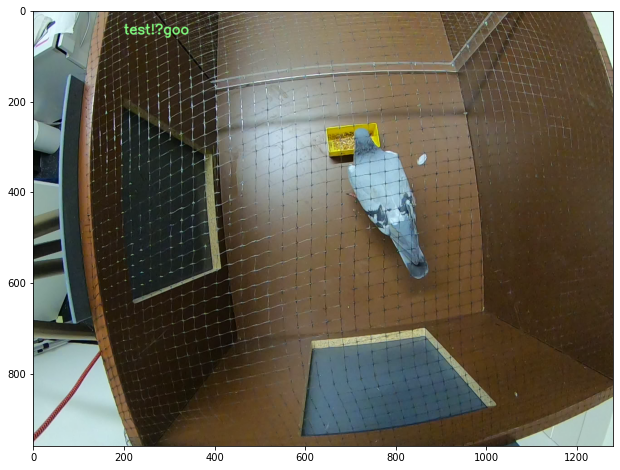

In [79]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]


plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [87]:
cap.release()
out.release()

In [94]:
np.array2string(preds_proba[1000], precision=1)

'[0.  0.  0.9 0.  0.  0.  0.  0.  0.  0.1 0. ]'

# New file

In [47]:
from winkie.dlc_importer import *

In [49]:
imp = DLCImporter()
df_new = imp.import_hdf('233_boxhab_gopro_cut_day1DLC_resnet50_goprovrJul24shuffle1_1030000.h5')
df_new = transform_to_relative(df_new, 'body')
df_new = add_middle_neck(df_new)
df_new = add_rotation(df_new)
df_new = apply_rotation(df_new)
df_new

bodyparts       head                              beak                         \
coords             x           y likelihood          x           y likelihood   
0         -65.435662  127.543280   0.999998 -53.423488  156.704460   0.999999   
1         -66.009174  127.496131   0.999999 -54.695819  157.007731   0.999999   
2         -64.358243  126.727970   0.999999 -52.320628  156.637774   0.999999   
3         -63.588678  127.584113   1.000000 -51.929889  157.023747   1.000000   
4         -63.464704  129.445743   0.999999 -51.443372  158.827613   1.000000   
...              ...         ...        ...        ...         ...        ...   
71920      -1.762229  146.565552   0.999989 -15.220555  168.643016   0.999995   
71921      -4.853456  148.729773   0.999987 -17.558797  169.609900   0.999985   
71922      -3.889307  146.217135   0.999988 -16.837361  168.381622   0.999993   
71923       1.472961  145.654696   0.999986 -10.802754  168.162516   0.999991   
71924       0.161139  146.848094   0.999987 -12.103728  169.176371   0.999989   

bodyparts  left_neck                        right_neck  ... right_down_wing  \
coords             x           y likelihood          x  ...      likelihood   
0          34.204284   91.980301   0.999413 -34.204284  ...        0.999973   
1          33.425651   93.342103   0.999514 -33.425651  ...        0.999992   
2          34.487290   91.503482   0.999641 -34.487290  ...        0.999984   
3          34.560088   90.804455   0.999759 -34.560088  ...        0.999990   
4          34.112867   90.985431   0.999696 -34.112867  ...        0.999994   
...              ...         ...        ...        ...  ...             ...   
71920      35.682009  103.485216   0.999957 -35.682009  ...        0.999980   
71921      33.551021  105.367148   0.999960 -33.551021  ...        0.999986   
71922      34.192154  103.499844   0.999977 -34.192154  ...        0.999992   
71923      36.533044  100.982586   0.999941 -36.533044  ...        0.999992   
71924      36.822547  103.256561   0.999967 -36.822547  ...        0.999994   

bodyparts body                       tail                         \
coords       x    y likelihood          x           y likelihood   
0          0.0  0.0   0.999997  -3.741541 -146.742265   0.999977   
1          0.0  0.0   0.999998  -0.901371 -145.689123   0.999987   
2          0.0  0.0   0.999999  -3.804718 -146.524731   0.999989   
3          0.0  0.0   0.999999  -3.886072 -146.127483   0.999988   
4          0.0  0.0   0.999999  -6.562678 -144.539214   0.999996   
...        ...  ...        ...        ...         ...        ...   
71920      0.0  0.0   0.999883  -8.848063 -142.069407   0.998778   
71921      0.0  0.0   0.999854  -9.196332 -140.147036   0.997782   
71922      0.0  0.0   0.999777  -6.931956 -142.070766   0.998865   
71923      0.0  0.0   0.999847 -13.705666 -141.219523   0.997260   
71924      0.0  0.0   0.999704 -12.660838 -140.203524   0.999479   

bodyparts   middle_neck             rotation_angle  
coords                x           y                 
0         -4.618406e-15   83.241109    -129.635637  
1          1.376255e-14   83.145090    -130.232570  
2          5.838615e-15   82.966436    -129.101572  
3         -1.326126e-14   83.118197    -128.690228  
4          1.040049e-14   83.634204    -128.090819  
...                 ...         ...            ...  
71920     -4.431411e-14  108.419685     -77.491347  
71921      2.725822e-14  110.335616     -77.750220  
71922     -3.148294e-14  108.429164     -78.038718  
71923      1.845794e-14  106.095983     -75.799544  
71924     -3.837059e-15  107.412217     -76.192813  

[71925 rows x 39 columns]

In [51]:
x = df_new[features].values
preds_proba = clf.predict_proba(x)
preds = clf.predict(x)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


In [52]:
import cv2
import numpy as np

np.set_printoptions(precision=2)

cap = cv2.VideoCapture('233_boxhab_gopro_cut_day1.MP4')
framerate = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('233_boxhab_gopro_cut_day1_pred.mp4', fourcc, framerate, (1280,  960))
frame_number = 0
while True:
    ret, frame = cap.read()
    if ret:

        b = preds[frame_number]
        proba = preds_proba[frame_number]
        cv2.putText(frame, b, (70, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (130, 255, 130), 2, cv2.LINE_AA)
        cv2.putText(frame, np.array2string(proba), (70, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (130, 255, 130), 1, cv2.LINE_AA)
        
        
        for i, v in enumerate(preds_proba[frame_number]):
            label = clf.classes_[i]
            y_pos = 120 + 20 * i
            x_pos = 250
            
            cv2.putText(frame, label, (70, y_pos), cv2.FONT_HERSHEY_SIMPLEX, 1, (130, 255, 130), 1, cv2.LINE_AA)
            
            bar = (int(x_pos + 100 * preds_proba[frame_number][i]), y_pos)
            cv2.line(frame, (x_pos, y_pos), bar, (0,0,255), 10)
        
        out.write(frame)

        frame_number = frame_number + 1
#         if frame_number == 1200:
#             break
    else:
        break

cap.release()
out.release()